### Import libraries

In [5]:
import datetime
import itertools
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline

### Load data files

In [2]:
# load the target dataset.
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()   
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
# Reshape to the form satiable to KNN model structure.
train_X = train_X.reshape(-1,3072)
train_Y = train_Y.reshape(-1,)
test_X = test_X.reshape(-1,3072)
test_Y = test_Y.reshape(-1,)

In [4]:
print('train_X shape:', train_X.shape)
print('train_Y shape:', train_Y.shape)
print('test_X shape:', test_X.shape)
print('test_Y shape:', test_Y.shape)
print('label_names:', label_names)

train_X shape: (50000, 3072)
train_Y shape: (50000,)
test_X shape: (10000, 3072)
test_Y shape: (10000,)
label_names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


### PCA

In [5]:
# Apply PCA for feature extraction.
t0 = datetime.datetime.now()

pca = PCA(n_components=40)
pca.fit(train_X, train_Y)

train_X_pca = pca.transform(train_X)
test_X_pca = pca.transform(test_X)

to = datetime.datetime.now() - t0
print('PCA runtime:', to)

PCA runtime: 0:00:23.233876


In [6]:
print('train_X_pca shape:', train_X_pca.shape)
print('test_X_pca shape:', test_X_pca.shape)

train_X_pca shape: (50000, 40)
test_X_pca shape: (10000, 40)


### KNN

In [7]:
### Construct KNN model employment.
clf = KNeighborsClassifier(n_neighbors=16,
                           weights='distance',     #{distance, uniform}
                           algorithm = 'auto'
                           )     

### CV

In [8]:
# execute the 10-fold cross validation exercise in training dataset.
t0 = datetime.datetime.now()

CV_accuracy_score = cross_val_score(clf, train_X_pca, train_Y, cv=10, scoring = 'accuracy')
CV_precision_score = cross_val_score(clf, train_X_pca, train_Y, cv=10, scoring = 'precision_macro')
CV_recall_score = cross_val_score(clf, train_X_pca, train_Y, cv=10, scoring = 'recall_macro')
CV_f1_score = cross_val_score(clf, train_X_pca, train_Y, cv=10, scoring = 'f1_macro')
average_accuracy = np.mean(CV_accuracy_score)
average_precision = np.mean(CV_precision_score)
average_recall = np.mean(CV_recall_score)
average_f1 = np.mean(CV_f1_score)

to = datetime.datetime.now() - t0
print('KNN runtime:', to)

KNN runtime: 0:15:24.849078


In [9]:
print('average_accuracy:', average_accuracy)
print('average_precision:', average_precision)
print('average_recall:', average_recall)
print('average_f1:', average_f1)

average_accuracy: 0.41306000000000004
average_precision: 0.45662363595213346
average_recall: 0.41306000000000004
average_f1: 0.40796058957196096


### Predict test set

In [10]:
# output the test data prediction result.
t0 = datetime.datetime.now() 

clf = clf.fit(train_X_pca, train_Y)
pred_Y = clf.predict(test_X_pca)

to = datetime.datetime.now() - t0
print('test runtime:', to)

test runtime: 0:01:13.020636


### Performance

In [11]:
accuracy_score(test_Y, pred_Y)

0.4268

In [12]:
def plot_confusion_matrix(cm, classes, normalize, title):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    title_font = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 15}
    label_font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 10}
    plt.title(title, fontdict=title_font)
    plt.ylabel('True label',fontdict=label_font)
    plt.xlabel('Predicted label',fontdict=label_font)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()

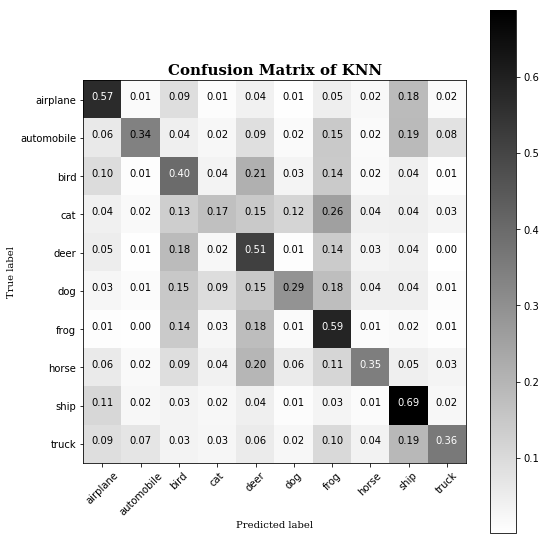

In [13]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_Y, pred_Y)
np.set_printoptions(precision=2)

# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=label_names, normalize=True, 
                      title='Confusion Matrix of KNN')

In [14]:
print(classification_report(test_Y, pred_Y, target_names=label_names))

             precision    recall  f1-score   support

   airplane       0.51      0.57      0.54      1000
 automobile       0.66      0.34      0.45      1000
       bird       0.31      0.40      0.35      1000
        cat       0.36      0.17      0.23      1000
       deer       0.31      0.51      0.39      1000
        dog       0.51      0.29      0.37      1000
       frog       0.34      0.59      0.43      1000
      horse       0.60      0.35      0.44      1000
       ship       0.46      0.69      0.55      1000
      truck       0.64      0.36      0.46      1000

avg / total       0.47      0.43      0.42     10000

